In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib
import warnings
warnings.filterwarnings('ignore')


In [89]:
#Load CSV
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")





In [90]:
train_df.shape

(614, 13)

In [91]:
test_df.shape

(367, 12)

In [92]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [94]:
combined = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [95]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [96]:
combined.shape

(981, 13)

In [97]:
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [98]:
combined.drop('Loan_ID', axis=1, inplace=True)


In [99]:
#Fill Missing Values
combined['Dependents'] = combined['Dependents'].replace('3+', 3)
combined['Dependents'] = combined['Dependents'].fillna(combined['Dependents'].mode()[0]).astype(int)


In [100]:
#Fill Missing Values
combined['LoanAmount'].fillna(combined['LoanAmount'].median(), inplace=True)
combined['Loan_Amount_Term'].fillna(combined['Loan_Amount_Term'].median(), inplace=True)


In [101]:

#Fill Missing Values
for col in ['Gender','Married','Education','Self_Employed','Credit_History']:
    combined[col].fillna(combined[col].mode()[0], inplace=True)


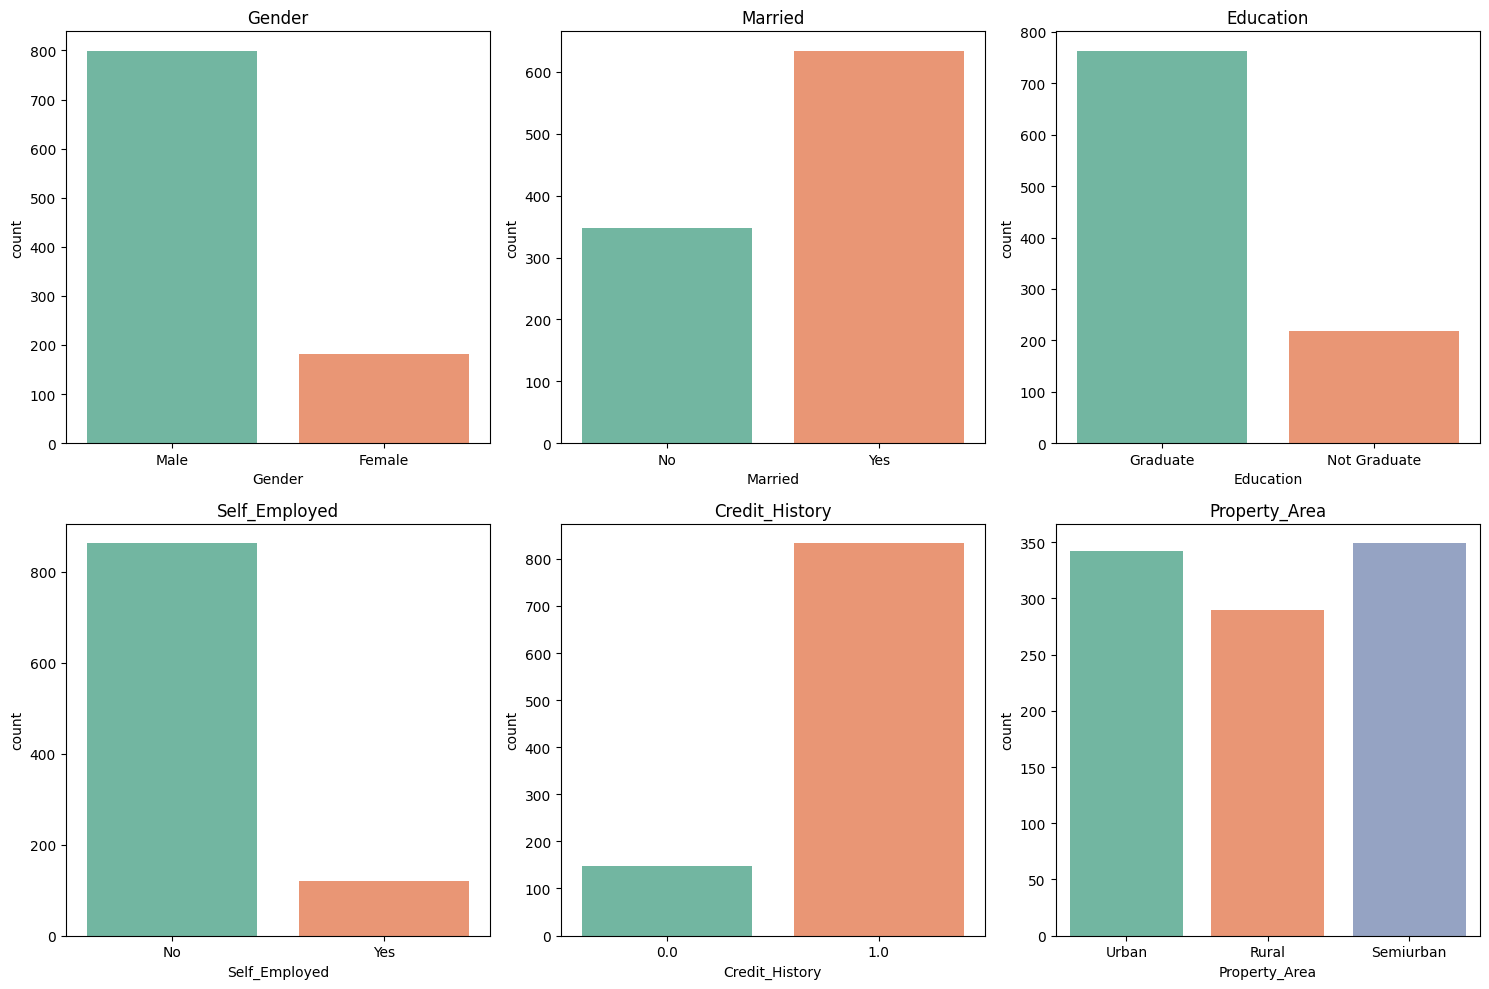

In [102]:
#Exploratory Data Analysis (EDA)
#Categorical Columns Distribution

categorical_cols = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area']

plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols,1):
    plt.subplot(2,3,i)
    sns.countplot(x=col, data=combined, palette='Set2')
    plt.title(col)
plt.tight_layout()
plt.show()


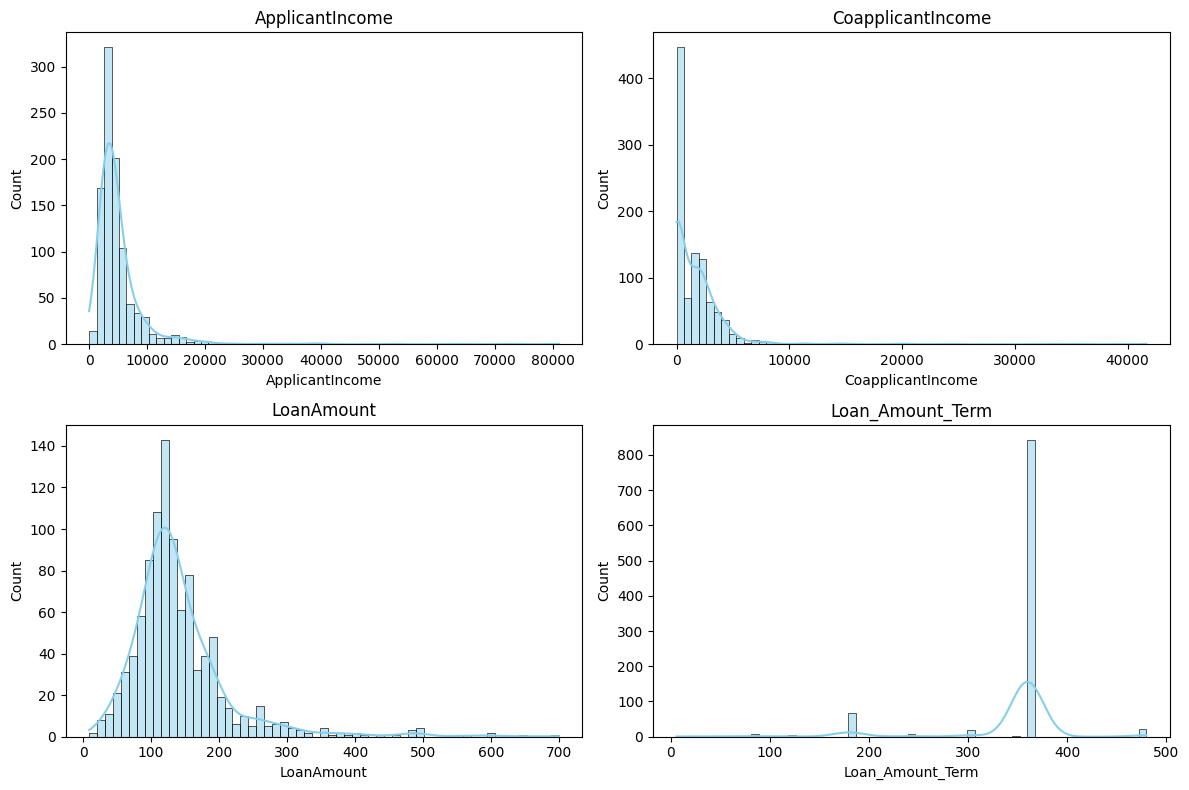

In [103]:
#Numeric Columns Distribution
numeric_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(2,2,i)
    sns.histplot(combined[col], kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()



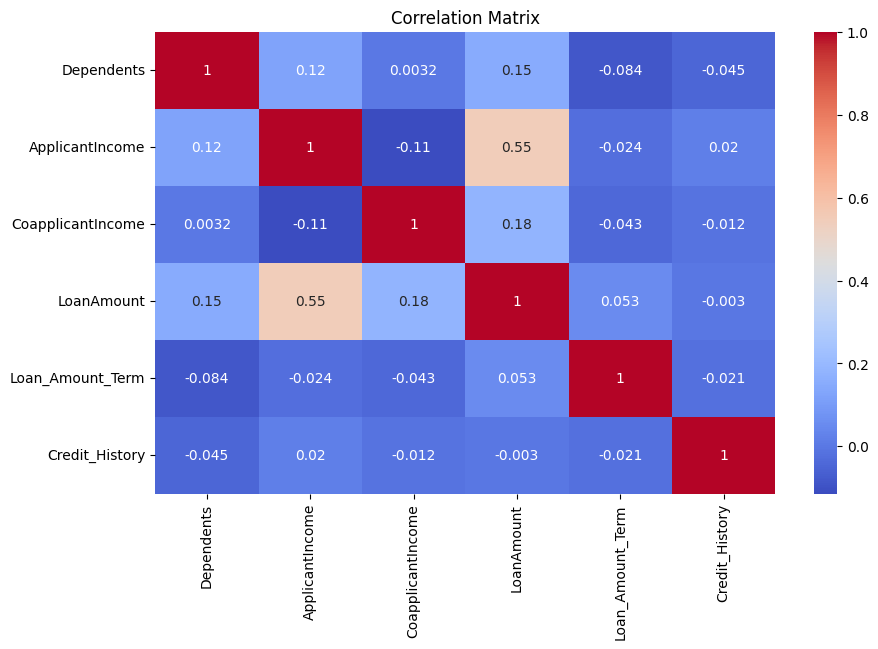

In [104]:
plt.figure(figsize=(10,6))
sns.heatmap(combined.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [105]:
combined['TotalIncome'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
combined['Income_Loan_Ratio'] = combined['TotalIncome'] / combined['LoanAmount']



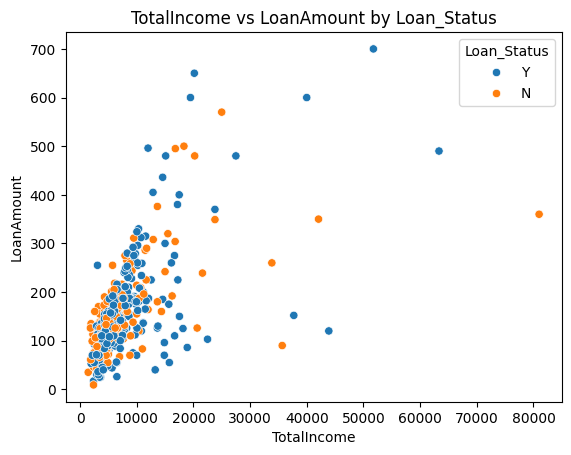

In [106]:
# Visualize relationship
sns.scatterplot(x='TotalIncome', y='LoanAmount', hue='Loan_Status', data=combined)
plt.title("TotalIncome vs LoanAmount by Loan_Status")
plt.show()


In [107]:
#Label Encode
binary_cols = ['Gender','Married','Education','Self_Employed','Credit_History','Loan_Status']
label_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))
    label_encoders[col] = le
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [108]:
combined = pd.get_dummies(combined, columns=['Property_Area'], drop_first=True)
property_cols = [col for col in combined.columns if 'Property_Area_' in col]
joblib.dump(property_cols, "property_cols.pkl")



['property_cols.pkl']

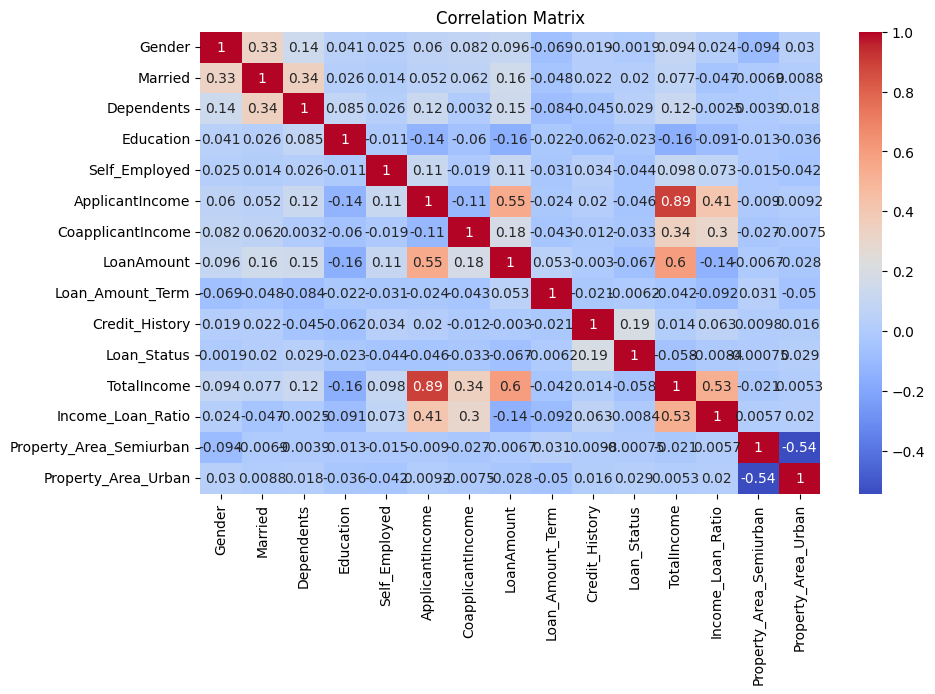

In [109]:

plt.figure(figsize=(10,6))
sns.heatmap(combined.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [110]:

from sklearn.preprocessing import StandardScaler

numeric_features = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","TotalIncome","Income_Loan_Ratio"]
scaler = StandardScaler()
combined[numeric_features] = scaler.fit_transform(combined[numeric_features])

# Save the scaler for deployment
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [111]:

from sklearn.model_selection import train_test_split
X = combined.drop('Loan_Status', axis=1)
y = combined['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [112]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    results[name] = acc
    print(f"{name} Training Accuracy: {acc:.4f}")


Logistic Regression Training Accuracy: 0.4962
Decision Tree Training Accuracy: 0.9987
Random Forest Training Accuracy: 0.9987
Gradient Boosting Training Accuracy: 0.8227
SVM Training Accuracy: 0.5612


In [113]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred = best_model.predict(X_train)
print(f"Best Model: {best_model_name}")
print(classification_report(y_train, y_pred))

Best Model: Decision Tree
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       154
           1       1.00      1.00      1.00       337
           2       1.00      1.00      1.00       293

    accuracy                           1.00       784
   macro avg       1.00      1.00      1.00       784
weighted avg       1.00      1.00      1.00       784



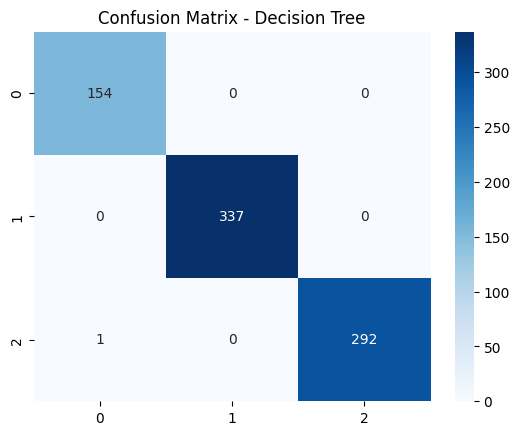

In [114]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

In [115]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy: 0.4120


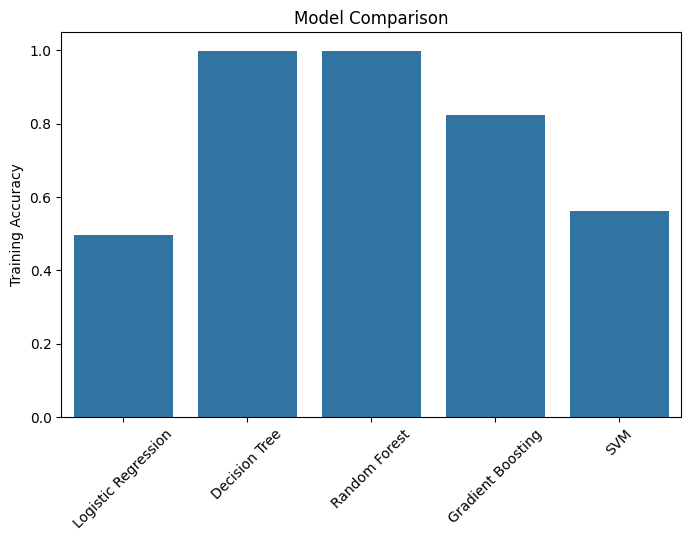

In [116]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Training Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()